# Documentacao - Projeto de Banco de Dados 

## Diagrama - relacionamento - Cinema Sauro

## Modelo Entidade Relacionamento
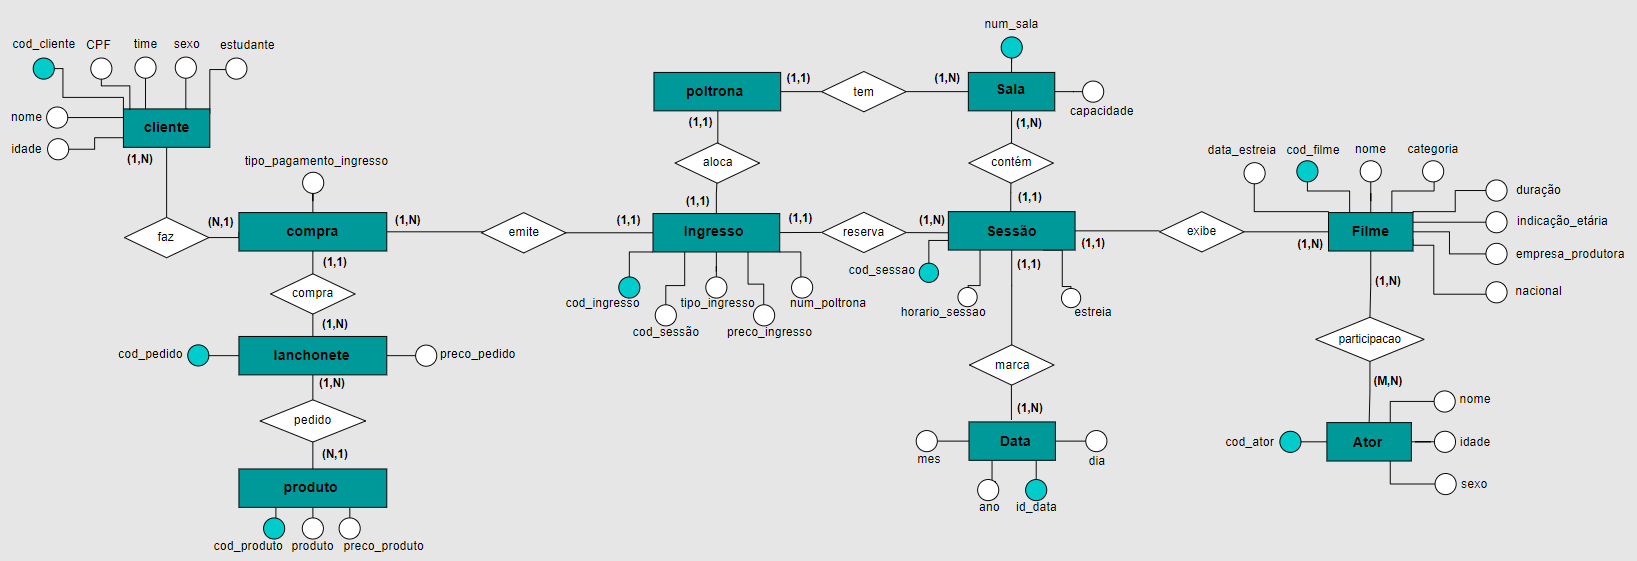

## Diagrama Entidade Relacionamento
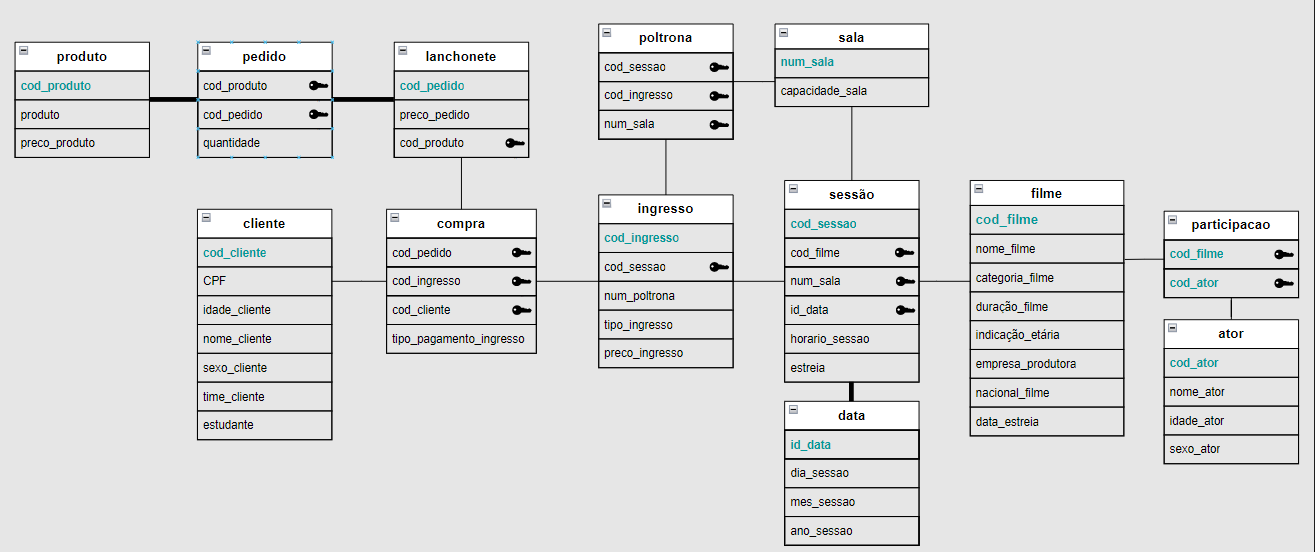

### Entidade Cliente
 - Definição: é a entidade principal associada às compras de pedidos na lanchonete e de ingresso. Sua chave primária é o seu código de cliente.

 ### Entidade Compra
 - Definição: é a entidade que faz a ponte entre o cliente e suas possíveis compras dentro do sistema, desde os produtos cadastrados na lanchonete até os ingressos para as sessões disponíveis.  

 ### Entidade Lanchonete
- Definição: é a entidade responsável por gerar o log de 
compra do cliente, isto é, o valor que ele deve pagar por cada produto e a sua respectiva quantidade. Sua chave primária é o código do pedido.

### Entidade Produto
- Definição: é uma entidade fraca dependente da lanchonete que identifica as características básicas de cada produto cadastrado na lanchonete para a realização de um pedido, isto é, seu código, nome e preço. Sua chave primária é o código produto.

### Entidade Ingresso
- Definição: é a entidade que representa o resultado da compra de uma entrada pra uma determinada sessão por parte do cliente. Nela estão contidas as informações a respeito da sessão a ser vista, o número da poltrona, o seu preço de acordo com o tipo de ingresso etc. Sua chave primária é o código ingresso.

### Entidade Sessão
- Definição: é a entidade que representa uma das unidades do cronograma do sistema, isto é, o conjunto de todas as sessões representa o cronograma do cinema. Em virtude disso, os principais atributos são aqueles que identificam o nome do filme, o horário que ele irá ser exibido, se trata-se de uma estreia ou não, e também a sua data via um outro relacionamento baseado no id. da data. Sua chave primária é o código da sessão.

### Entidade Data
- Definição: é a entidade fraca associada a sessão mediante sua chave primária id. da data. Nela estão contidas a informação do dia, mês e ano da sessão.

### Entidade Sala
- Definição: é a entidade cujo conjunto representa o total de 45 salas disponíveis no cinema. É uma entidade com apenas 2 atributos, sendo eles a sua chave primária - número de sala - e a sua capacidade.

### Entidade Poltrona
- Definição: é a entidade responsável por demarcar as poltronas que estão sendo ocupadas por cada cliente diferente em suas respectivas sessões, isto é, o propósito dessa entidade é que um mesmo cliente, ou uma mesma compra de um cliente, não envolva comprar um ingresso para uma mesma sessão em uma mesma poltrona.

### Entidade Filme
- Definição: é uma das entidades principais do sistema, cujas especificações foram modeladas de acordo com o projeto proposto, portanto, existe um atributo de nome, duração, faixa etária, empresa produtora etc de cada filme. Vale ressaltar que cada filme possui um elenco. Sua chave primária é o código filme.
 
### Entidade Ator
- Definição: é a entidade que contém todos os possíveis atores, com suas informações básicas, tais quais sexo, nome e idade, que podem participar ou não de cada um dos filmes disponíveis no sistema. Sua chave primária é o código ator. 

## DQL - Data Query Language - Linguagem de Consulta de dados.
- São os comandos de consulta.
- São comandos DQL : SELECT (é o comando de consulta)
- Obs.: Não serão listados SELECTs muito triviais, tais quais 'SELECT * FROM Filme'.
    ### 1.1 - Consulta para listas todos os atores em ordem alfabética e os seus respectivos filmes nos quais atuaram
        SELECT nome_ator, nome_filme FROM
        (SELECT * from (select * from FILME
        INNER JOIN Participa_Filme_Ator ON
        FILME.cod_filme = Participa_Filme_Ator.cod_filme) AS A
        INNER JOIN ATOR AS B ON A.cod_ator = B.cod_ator)
        ORDER BY nome_ator

    ### 1.2 - Consulta para listas todos os atores em ordem alfabética e o numero total de filmes nos quais atuaram
        SELECT  nome_ator, COUNT  (nome_filme) AS
        Numero_de_filmes FROM (SELECT * FROM (SELECT * FROM FILME
        INNER JOIN Participa_Filme_Ator ON FILME.cod_filme = Participa_Filme_Ator.cod_filme) AS A
        INNER JOIN ATOR AS B ON A.cod_ator = B.cod_ator) GROUP BY nome_ator ORDER BY nome_ator

    ### 1.3 - Consulta para listas todas as sessões disponíveis e suas principais informações para o cliente
        SELECT cod_sessao,
        nome_filme,
        num_sala,
        horario_sessao,
        dia_sessao,
        mes_sessao,
        ano_sessao
        FROM
        (SELECT * FROM (SELECT * FROM Data
        AS C INNER JOIN (SELECT * from Filme as A
        INNER JOIN Sessao AS B ON 
        A.cod_filme = B.cod_filme) AS D
        ON C.id_data = D.id_data)) 

    ### 1.4 - Consulta para contabilizar a receita levantada por cada um dos produtos cadastrados
        SELECT cod_produto,
        produto,
        SUM(preco_produto) AS receita_produto
        FROM (SELECT * from Lanchonete AS A INNER JOIN
        produto AS B ON A.cod_produto = B.cod_produto)
        GROUP BY cod_produto

    ### 1.5 - Consulta para contabilizar a receita levantada por cada uma das sessões cadastradas 

        SELECT cod_sessao, SUM(preco_ingresso) as 
        receita_ingresso ROM Ingresso GROUP by cod_sessao